In [12]:
# Import some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
# replace input_dim
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
# finally concatenate
from tensorflow.keras.layers import concatenate, add

In [2]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

functional api使用時機:當神經網路模型為非線性的複雜網路結構


In [3]:
#第一個變數以 Input 函數來定義
x = Input(shape=(784,))
f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(350, activation='sigmoid')
f_4 = Dense(250, activation='relu')
f_3 = Dense(10, activation='softmax')

In [4]:
h_1 = f_1(x)
h_2 = f_2(h_1)
z = f_4(h_1)
u = concatenate([h_2, z])
y = f_3(u)

In [5]:
print(x)

Tensor("input_1:0", shape=(None, 784), dtype=float32)


In [0]:
h_1 = f_1(x)
h_2 = f_2(h_1)
y = f_3(h_2)

In [6]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 350)          175350      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 250)          125250      dense[0][0]                      
______________________________________________________________________________________________

In [7]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

修改部分:將batch size改為112、epochs改為5次

In [8]:
mydata=model.fit(X_train, y_train, 
          batch_size=112, 
          epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0291 - accuracy: 0.7926
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0212 - accuracy: 0.8529
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0192 - accuracy: 0.8682
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0182 - accuracy: 0.8752
Epoch 5/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0172 - accuracy: 0.8809


準確率

In [9]:
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 2s 28us/sample - loss: 0.0162 - accuracy: 0.8899
Loss: 0.016190039925277233
準確率: 88.98500204086304


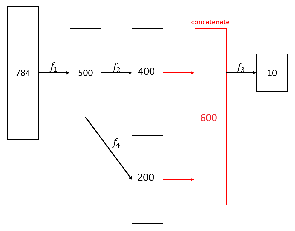

In [14]:
#神經網路示意圖
image = pimg.imread('branch-and-merge_final.png')
plt.imshow(image) 
plt.axis('off') 
plt.show()